In [6]:
import itertools
import linecache
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pprint
import scipy
import seaborn as sns
from matplotlib.transforms import Bbox

pp = pprint.PrettyPrinter(indent=4)

print("Using pandas %s version" % pd.__version__)
print("Using seaborn %s version" % sns.__version__)
print("Using scipy %s version" % scipy.__version__)

Using pandas 1.2.0 version
Using seaborn 0.11.1 version
Using scipy 1.6.0 version


In [7]:
rec_colors_dict = {
    "iMF (full)": "#548235",
    "iMF (test)": "#99C979",
    "kNN (full/test)": "#C55A11",
    "kNN (full)": "#C55A11",
    "kNN (test)": "#ff5811",
    "Normalized kNN (full)": "#4A76C6",
    "Normalized kNN (test)": "#19C3FF",
    "Average Rating": "#FFC000",
    "Popularity": "#F18F8F",
    "Random": "#BFBFBF",
}
# colors = ('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange')
# rec_colors = (
#     imfFull,
#     imfTest,
#     knnFull,
#     knnTest,
#     normalizedKnnFull,
#     normalizedKnnTest,
#     average,
#     popularity,
#     random,
# )

data_dir = r"C:\Projects\RecSys2020\results\\"


def hide_spines(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)



def get_figure_data(file_name):
    file = os.path.join(r"C:\Projects\RecSys2020\results", file_name)
    print(file)
    lines_with_metrics = [
        (i, linecache.getline(file, i + 1).strip())
        for i, line in enumerate(open(file))
        if line.endswith("@10\n")
    ]
    # print('\t' + lines_with_metrics)
    rows = lines_with_metrics[2][0] - lines_with_metrics[1][0] - 3
    params = dict(filepath_or_buffer=file, sep="\t", nrows=rows)
    data = dict()
    for j, metric in enumerate(lines_with_metrics):
        metric_name = metric[1]
        metric_line = metric[0]
        data[metric_name] = pd.read_table(header=metric_line - j, **params)
    return data

def split_metrics(d):
    # P@10'), (20, 'Recall@10'), (36, 'nDCG@10'), (52, 'FScore@10'
    return d["P@10"], d["Recall@10"], d["nDCG@10"], d["FScore@10"]


In [8]:
data = get_figure_data("figure2..txt")
precision, recall, ndcg, fscore = split_metrics(data)

pp.pprint((precision, recall, ndcg, fscore))
# ndcg = pd.read_table(
#     r"C:\Projects\RecSys2020\results\figure2.txt", sep="\t", header=4, nrows=8
# )
# precision = pd.read_table(
#     r"C:\Projects\RecSys2020\results\figure2.txt", sep="\t", header=14, nrows=8
# )
# recall = pd.read_table(
#     r"C:\Projects\RecSys2020\results\figure2.txt", sep="\t", header=24, nrows=8
# )

# data_dir = r"C:\Projects\RecSys2020\results\\"
# data_dir = r"C:\Projects\RecSys2020\results\img\\"

# imfFull = "#548235"
# imfTest = "#99C979"
#
# knnFullTest = "#C55A11"
# normalizedKnnFull = "#4A76C6"
# normalizedKnnTest = "#19C3FF"
#
# average = "#FFC000"
# popularity = "#F18F8F"
# random = "#BFBFBF"
#
# # colors = ('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange')
# rec_colors = (
#     imfFull,
#     imfTest,
#     knnFullTest,
#     normalizedKnnFull,
#     normalizedKnnTest,
#     average,
#     popularity,
#     random,
# )

C:\Projects\RecSys2020\results\figure2..txt
(                Recommender      Full  Unbiased      Test
0             iMF (full)  0.056737  0.006748  0.170422
1             iMF (test)  0.052974  0.006656  0.170752
2             kNN (full)  0.054822  0.006511  0.169844
3             kNN (test)  0.051615  0.004581  0.170044
4  Normalized kNN (full)  0.043452  0.005426  0.168348
5  Normalized kNN (test)  0.000959  0.003415  0.170044
6         Average Rating  0.000848  0.001593  0.169507
7             Popularity  0.035081  0.004278  0.168052
8                 Random  0.001956  0.000833  0.166637,
                 Recommender      Full  Unbiased      Test
0             iMF (full)  0.236821  0.044939  0.666691
1             iMF (test)  0.225400  0.044407  0.667171
2             kNN (full)  0.229091  0.042268  0.665702
3             kNN (test)  0.217188  0.029538  0.666411
4  Normalized kNN (full)  0.184988  0.035367  0.661933
5  Normalized kNN (test)  0.004106  0.021709  0.666225
6         Av

In [9]:
def reshape_results(data):
    result = [
        list(a)
        for a in zip(
            data.Recommender,
            data.Full.rank(ascending=False, method='dense'),
            data.Unbiased.rank(ascending=False, method='dense'),
            data.Test.rank(ascending=False, method='dense'),
        )
    ]
    return result


r = reshape_results(recall)
p = reshape_results(precision)
n = reshape_results(ndcg)
f = reshape_results(fscore)

pp.pprint((p,r,n,f))

(   [   ['iMF (full)', 1.0, 1.0, 2.0],
        ['iMF (test)', 3.0, 2.0, 1.0],
        ['kNN (full)', 2.0, 3.0, 4.0],
        ['kNN (test)', 4.0, 5.0, 3.0],
        ['Normalized kNN (full)', 5.0, 4.0, 6.0],
        ['Normalized kNN (test)', 8.0, 7.0, 3.0],
        ['Average Rating', 9.0, 8.0, 5.0],
        ['Popularity', 6.0, 6.0, 7.0],
        ['Random', 7.0, 9.0, 8.0]],
    [   ['iMF (full)', 1.0, 1.0, 2.0],
        ['iMF (test)', 3.0, 2.0, 1.0],
        ['kNN (full)', 2.0, 3.0, 5.0],
        ['kNN (test)', 4.0, 5.0, 3.0],
        ['Normalized kNN (full)', 5.0, 4.0, 8.0],
        ['Normalized kNN (test)', 8.0, 7.0, 4.0],
        ['Average Rating', 9.0, 8.0, 6.0],
        ['Popularity', 6.0, 6.0, 7.0],
        ['Random', 7.0, 9.0, 9.0]],
    [   ['iMF (full)', 1.0, 1.0, 3.0],
        ['iMF (test)', 4.0, 2.0, 1.0],
        ['kNN (full)', 2.0, 3.0, 6.0],
        ['kNN (test)', 3.0, 5.0, 5.0],
        ['Normalized kNN (full)', 5.0, 4.0, 7.0],
        ['Normalized kNN (test)', 8.0, 6.0, 2.

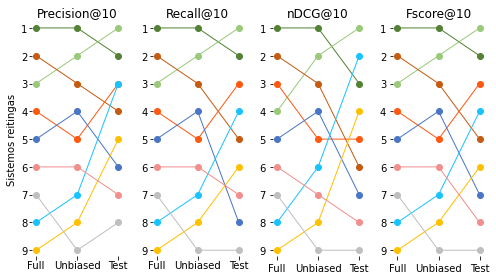

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex="row")


def figure1(data, ax, title):
    artists = []
    for row in data:
        artist = plt.Line2D(
            xdata=[1, 2, 3], ydata=[row[1:]], lw=1, color=rec_colors_dict[row[0]], marker="o"
        )
        artists.append(artist)
        ax.add_artist(artist)

    ax.set_ybound([0.8, len(artists) + .2])
    ax.set_xbound([0.90, 3.1])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_title(title)
    ax.invert_yaxis()
    return artists


figure1(p, ax1, "Precision@10")
figure1(r, ax2, "Recall@10")
figure1(n, ax3, "nDCG@10")
artists = figure1(f, ax4, "Fscore@10")
ax1.set_ylabel("Sistemos reitingas")

ax1.tick_params(axis="both", which="both", pad=1)
ax2.tick_params(axis="both", which="both", pad=1)

plt.xticks([1, 2, 3], ["Full", "Unbiased", "Test"])

# plt.legend(
#     artists,
#     recall.Recommender,
#     bbox_to_anchor=(1.05, 1),
#     loc="upper left",
#     # title="Recommender",
#     title_fontsize="x-large",
# )
fig.set_size_inches(7, 4)
fig.tight_layout()
png = os.path.join(data_dir, "figure2.final.png")
fig.savefig(png, format="png", dpi=300)
plt.show()